In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

# for inline plots in jupyter
%matplotlib inline 

#removing warning messages CHECK THIS IF SOMETHING BREAKS!!!!!
pd.options.mode.chained_assignment = 'warn'  # default='warn'

data_path = "Marketing_Campaign_final.csv"

df = pd.read_csv(data_path)

Split the data set to X and y.<br>
X for the features and y for the target. 

In [14]:
X = df.drop('Response', axis=1)
y = df['Response']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

Create Decision Tree classifier object, train it on the train set and predict the labels to the test set.<br>

In [16]:
clf = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf = clf.fit(X_train,y_train)

# Predict the label
y_pred = clf.predict(X_test)

#### Acuuracy and confusion matrix:

In [17]:
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

0.8164251207729468


0   1
0  305  53
1   23  33

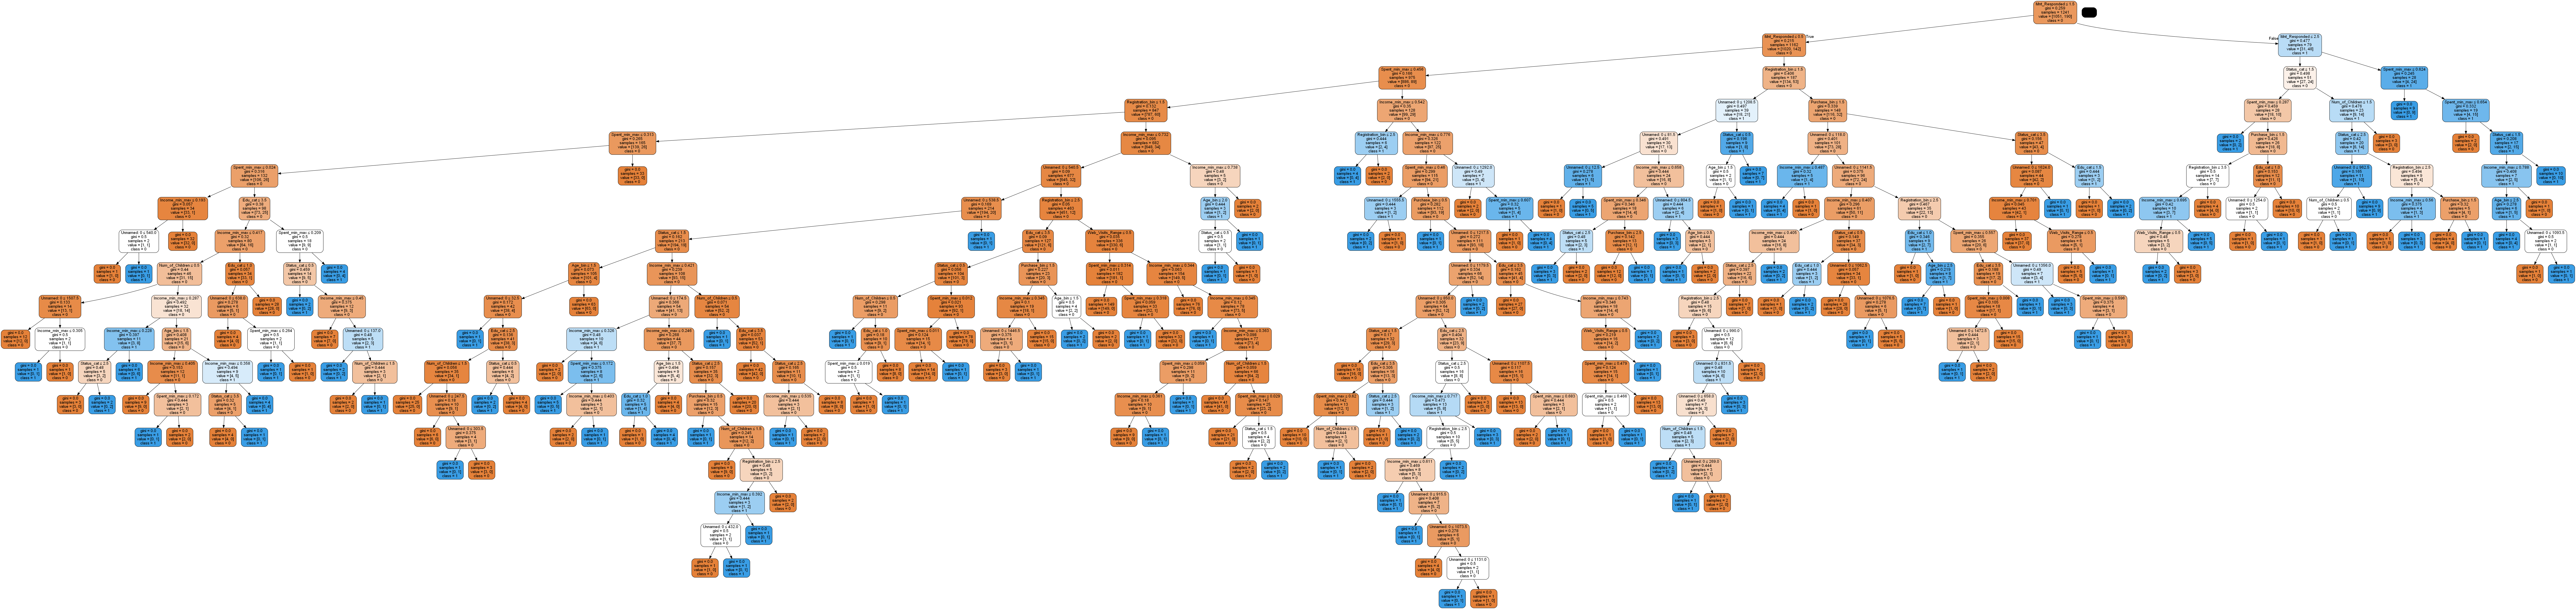

In [18]:
dot = export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree1.png')
Image(graph.create_png())

## Overfitting

In [19]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

1.0


0    1
0  1051    0
1     0  190

In [20]:
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf2 = clf2.fit(X_train,y_train)

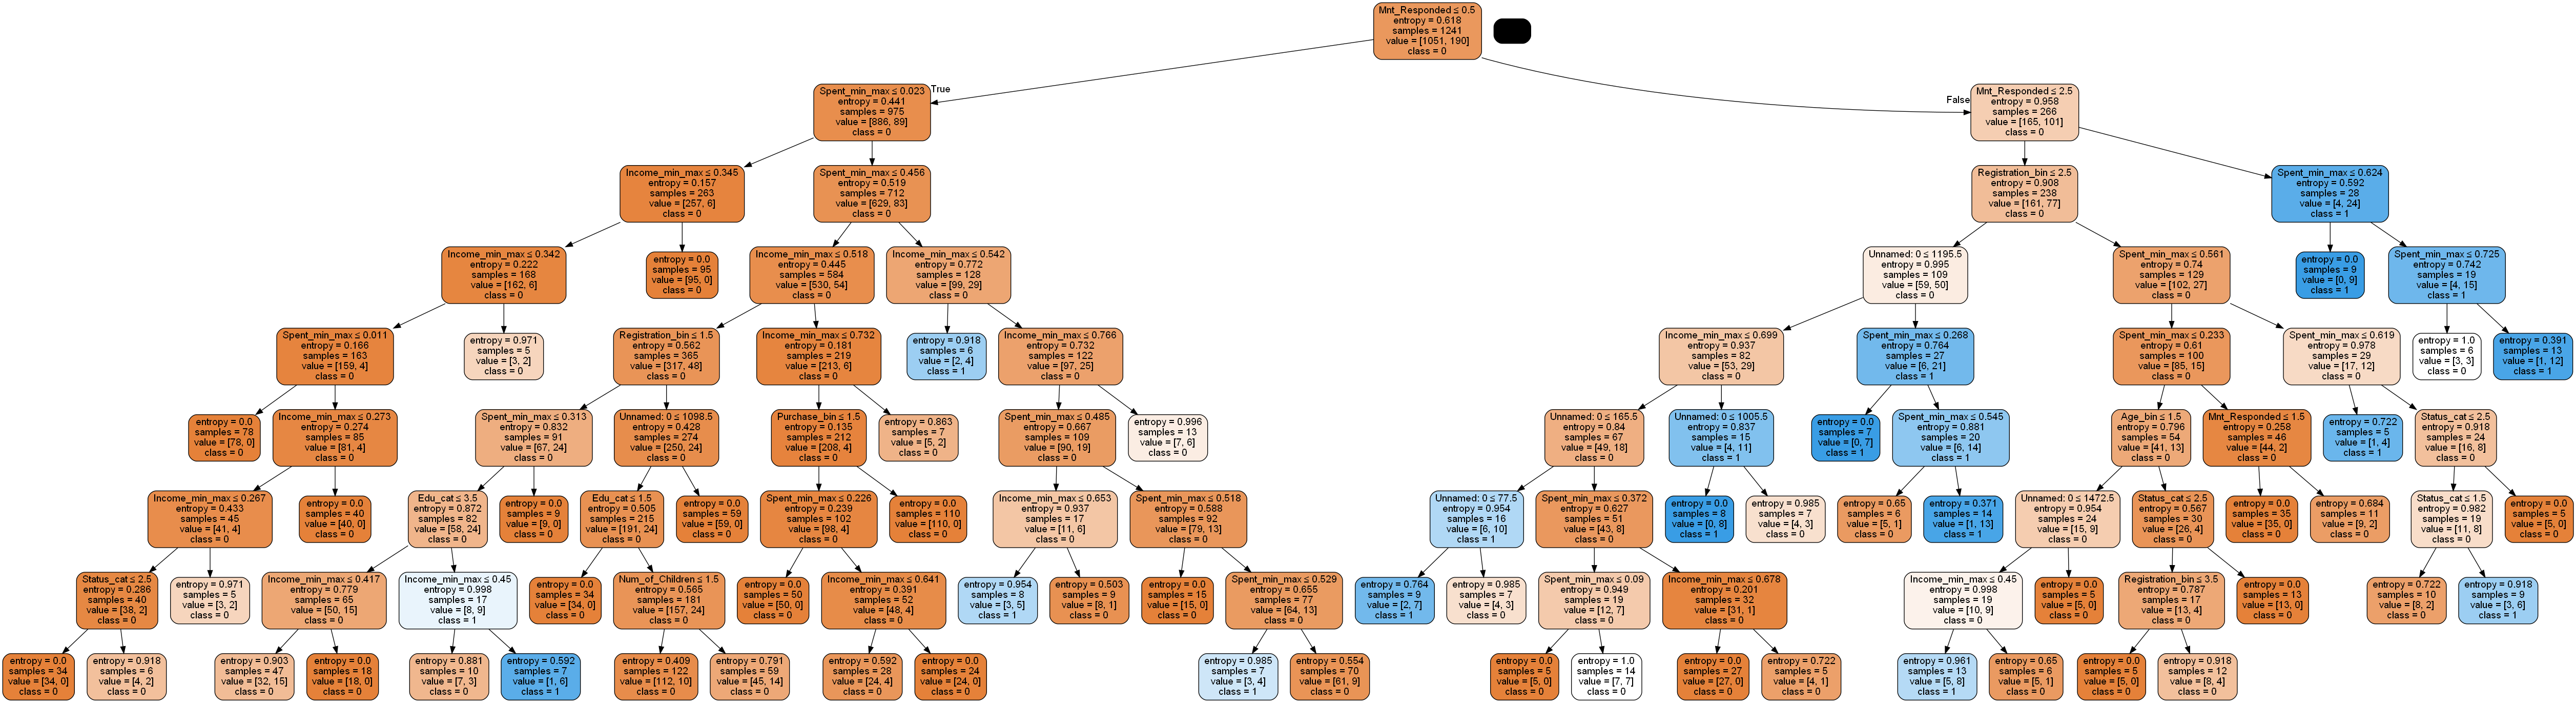

In [21]:
dot = export_graphviz(clf2, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree2.png')
Image(graph.create_png())

In [22]:
y_train_pred2 = clf2.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred2))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred2))

0.9041095890410958


0   1
0  1029  22
1    97  93

In [23]:
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2))

0.8429951690821256


0   1
0  335  23
1   42  14

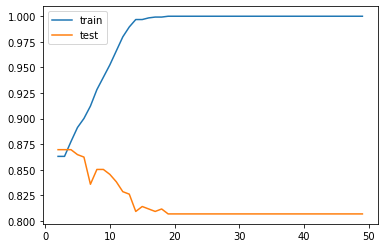

In [24]:
train_scores, test_scores = [],[]
for k in range(2,50):
    clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                              max_depth=k, random_state=42) 
    clf3.fit(X_train,y_train)
    train_scores.append(clf3.score(X_train, y_train))
    test_scores.append(clf3.score(X_test, y_test))
plt.plot(range(2,50), train_scores)
plt.plot(range(2,50), test_scores)
plt.legend(['train','test'])
plt.show()